#CHALLENGE 2 : Customer Churn Prediction
##**Nama     : Adek Putri Dewanti**
##**Kelompok : DS7-7 (INDIVIDUAL)**



In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve,classification_report
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [19]:
pip install category_encoders

#**1.) Data Overview**


In [20]:
df_train = pd.read_csv('/content/Data Train.csv')
df_test = pd.read_csv('/content/Data Test.csv')


####Deskripsi masing-masing features:

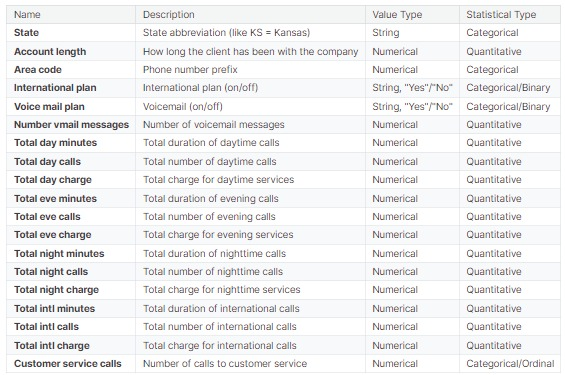

In [21]:
df_train.head(6)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no


In [22]:
df_test.head(6)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
5,6,IL,142,area_code_415,no,no,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2


# **2.) Asessing Data**



In [23]:
# Buat fungsi definisi untuk pengecekan data pada train dan test dataset
def overview(df, message):
  print(f'{message}:\n')
  print('\nRows:', df.shape[0]) #[0]= Baris, [1]=Kolom
  print('\nNumber of Features:', df.shape[1])
  print('\nCheking Datatype:')
  print(df.info()) # Memeriksa datatype di setiap features
  print('\nChecking Missing Value:', df.isnull().sum().values.sum()) # Memeriksa missing values
  print('\nChecking Duplicated Value:', df.duplicated().sum()) # Memeriksa nilai yang terduplikasi


In [24]:
overview(df_train, 'Overview Customer Churn Train Dataset')

Overview Customer Churn Train Dataset:


Rows: 4250

Number of Features: 20

Cheking Datatype:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_cha

In [25]:
df_train.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


In [26]:
overview(df_test, 'Overview Customer Churn Test Dataset')

Overview Customer Churn Test Dataset:


Rows: 750

Number of Features: 20

Cheking Datatype:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls  

In [27]:
df_test.describe(include='all')

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750,750.000000,750,750,750,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
unique,NaN,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AL,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,NaN,387,673,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,375.50000,NaN,100.385333,NaN,NaN,NaN,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,NaN,39.699029,NaN,NaN,NaN,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,NaN,1.000000,NaN,NaN,NaN,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,NaN,74.000000,NaN,NaN,NaN,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,NaN,101.000000,NaN,NaN,NaN,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,NaN,126.000000,NaN,NaN,NaN,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000


# **3.) Exploratory Data Analysis (EDA)**




In [28]:
# Memeriksa perbandingan banyaknya 'yes' dan 'no' pada columns churn
churn_counts = df_train['churn'].value_counts()
churn_counts

churn
no     3652
yes     598
Name: count, dtype: int64

Lebih dominan churn 'no' dibandingkan dengan 'yes'

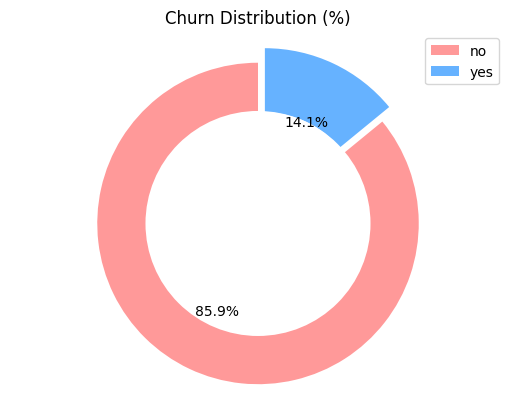

In [29]:
labels = churn_counts.index
colors = ['#FF9999', '#66B2FF']
explode = (0, 0.1)

# visualisasi pie chart
fig, ax = plt.subplots()
ax.pie(churn_counts, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4), explode=explode)

# Visualsisasi efek donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Atur aspek axis menjadi equal agar lingkaran terlihat bulat
ax.axis('equal')
plt.legend(labels, loc='upper right')

plt.title('Churn Distribution (%)')
plt.savefig('pie chart')
plt.show()

Presentase kategor 'no' lebih tinggi daripada kategori 'yes'


Boxplot for feature: account_length


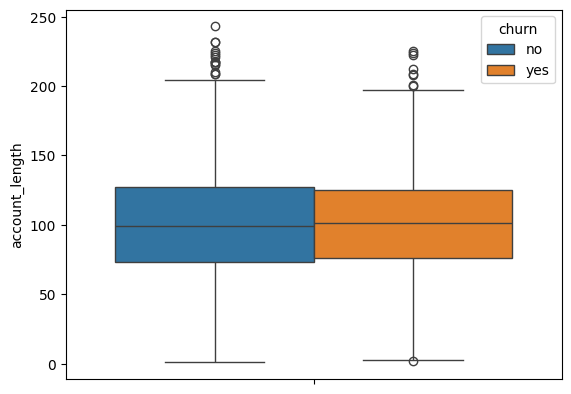


Boxplot for feature: number_vmail_messages


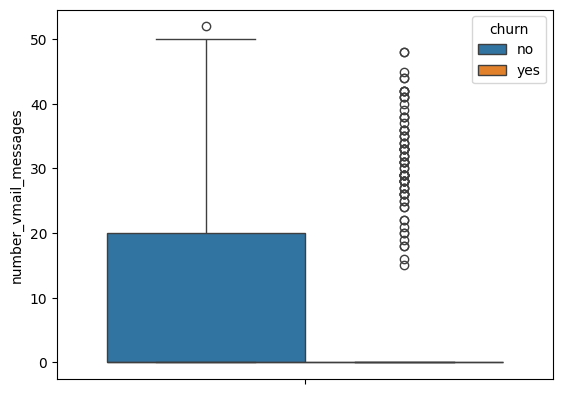


Boxplot for feature: total_day_minutes


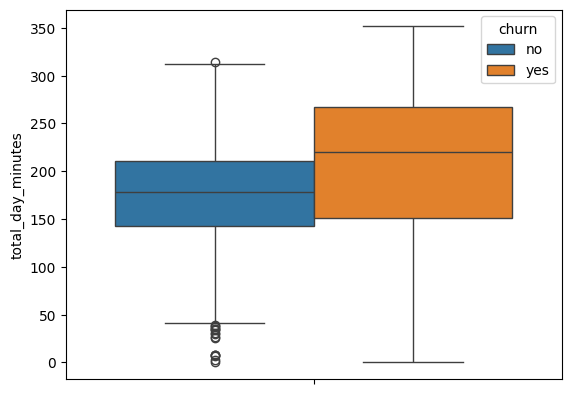


Boxplot for feature: total_day_calls


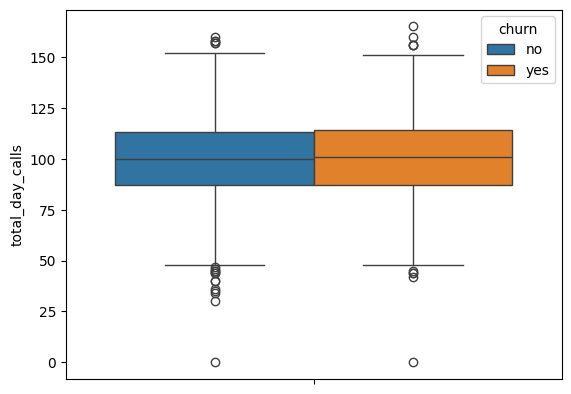


Boxplot for feature: total_day_charge


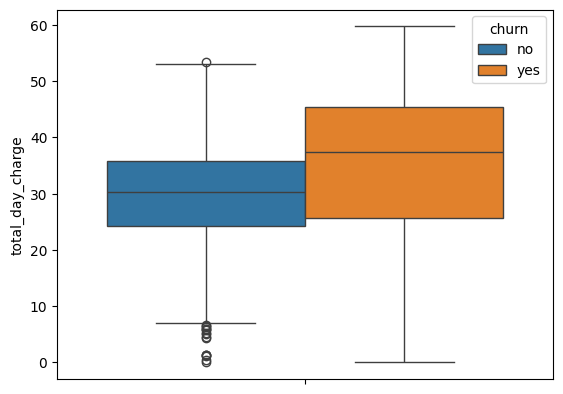


Boxplot for feature: total_eve_minutes


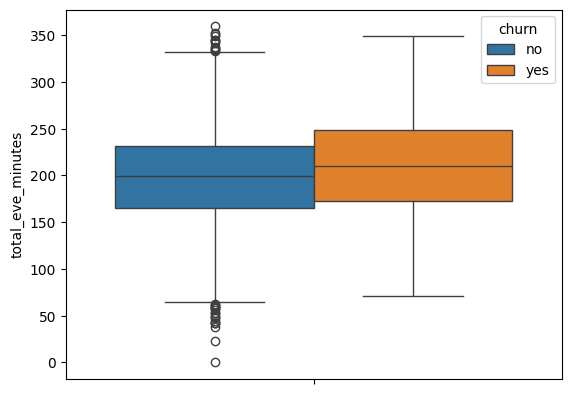


Boxplot for feature: total_eve_calls


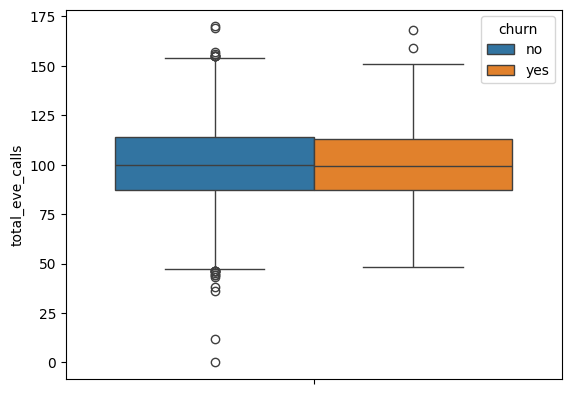


Boxplot for feature: total_eve_charge


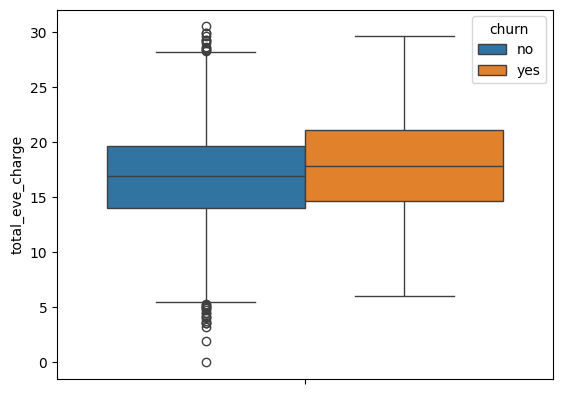


Boxplot for feature: total_night_minutes


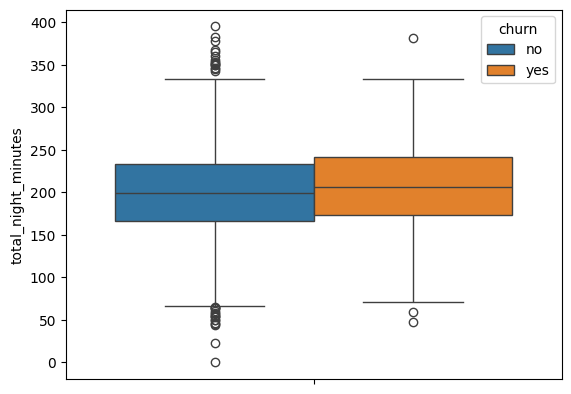


Boxplot for feature: total_night_calls


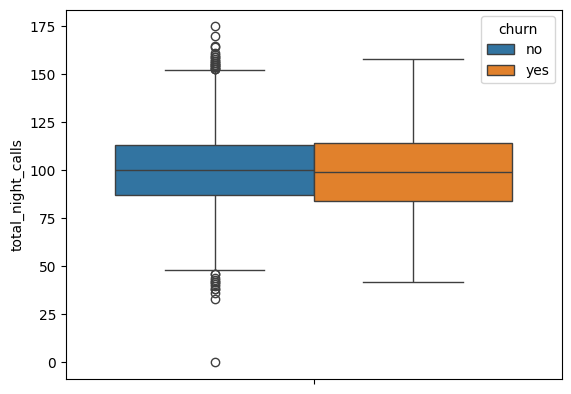


Boxplot for feature: total_night_charge


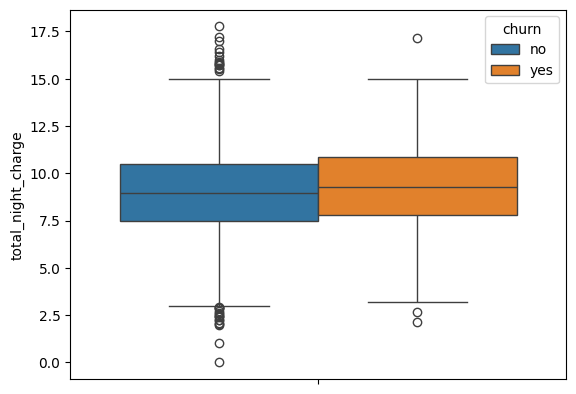


Boxplot for feature: total_intl_minutes


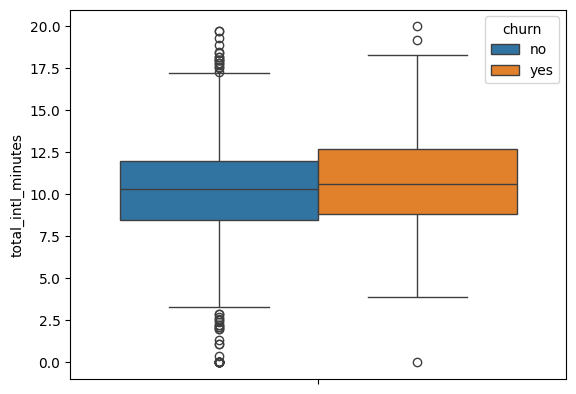


Boxplot for feature: total_intl_calls


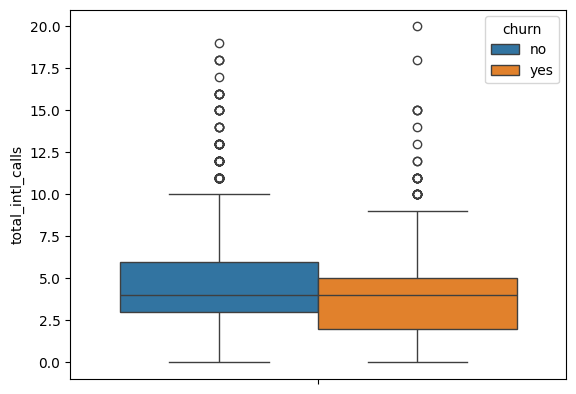


Boxplot for feature: total_intl_charge


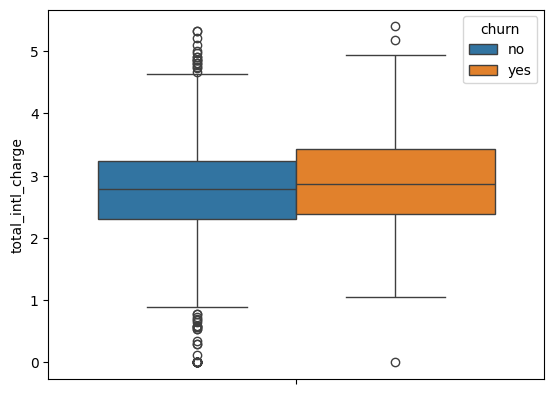


Boxplot for feature: number_customer_service_calls


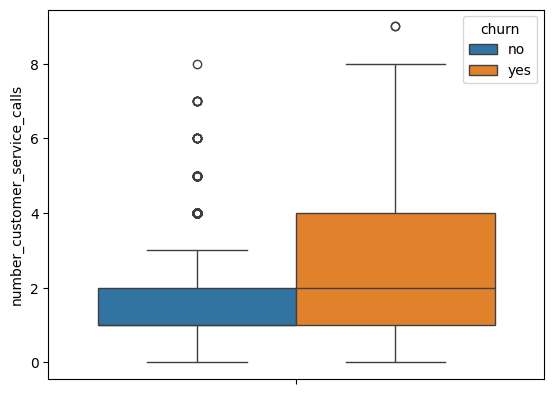

In [30]:

train = df_train.drop(['churn'],axis=1)

for col in train.columns:
  if str(df_train[col].dtype) != "object":
    print("Boxplot for feature:",col)
    sns.boxplot(y=col,hue="churn",data=df_train)
    plt.show()
    print()

**Observasion:** Dari grafik ini, kita dapat melihat bahwa perbedaan terbesar dalam distribusi antara kedua kelompok (churn) adalah  feature-feature sebagai berikut:
- international plan
- voice mail plan
- number vmail messanges
- total day,eve,night,intl minutes
- total day,eve,night,intl charge
- number customer service calls

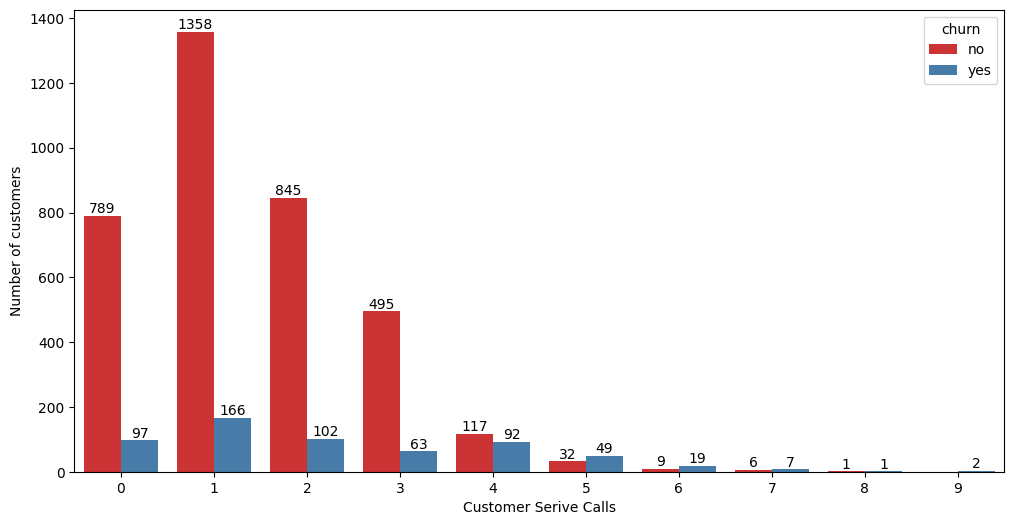

In [31]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='number_customer_service_calls', hue="churn", data=df_train, palette='Set1')
ax.set_xlabel('Customer Serive Calls')
ax.set_ylabel('Number of customers')

# Menambahkan annotate
for p in ax.containers:
  ax.bar_label(p,)

plt.show()

####**Observasion:** Pada panggilan ke 4 dan seterusnya, jumlah pelanggan churn meningkat

In [32]:
# Mengganti nilai 'no' dan 'yes' dengan [0,1] menggunakan replace dengan inplace=True
df_train['churn'].replace({'no': 0, 'yes': 1}, inplace=True)
df_train['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df_train['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)


df_test['international_plan'].replace({'no': 0, 'yes': 1}, inplace=True)
df_test['voice_mail_plan'].replace({'no': 0, 'yes': 1}, inplace=True)


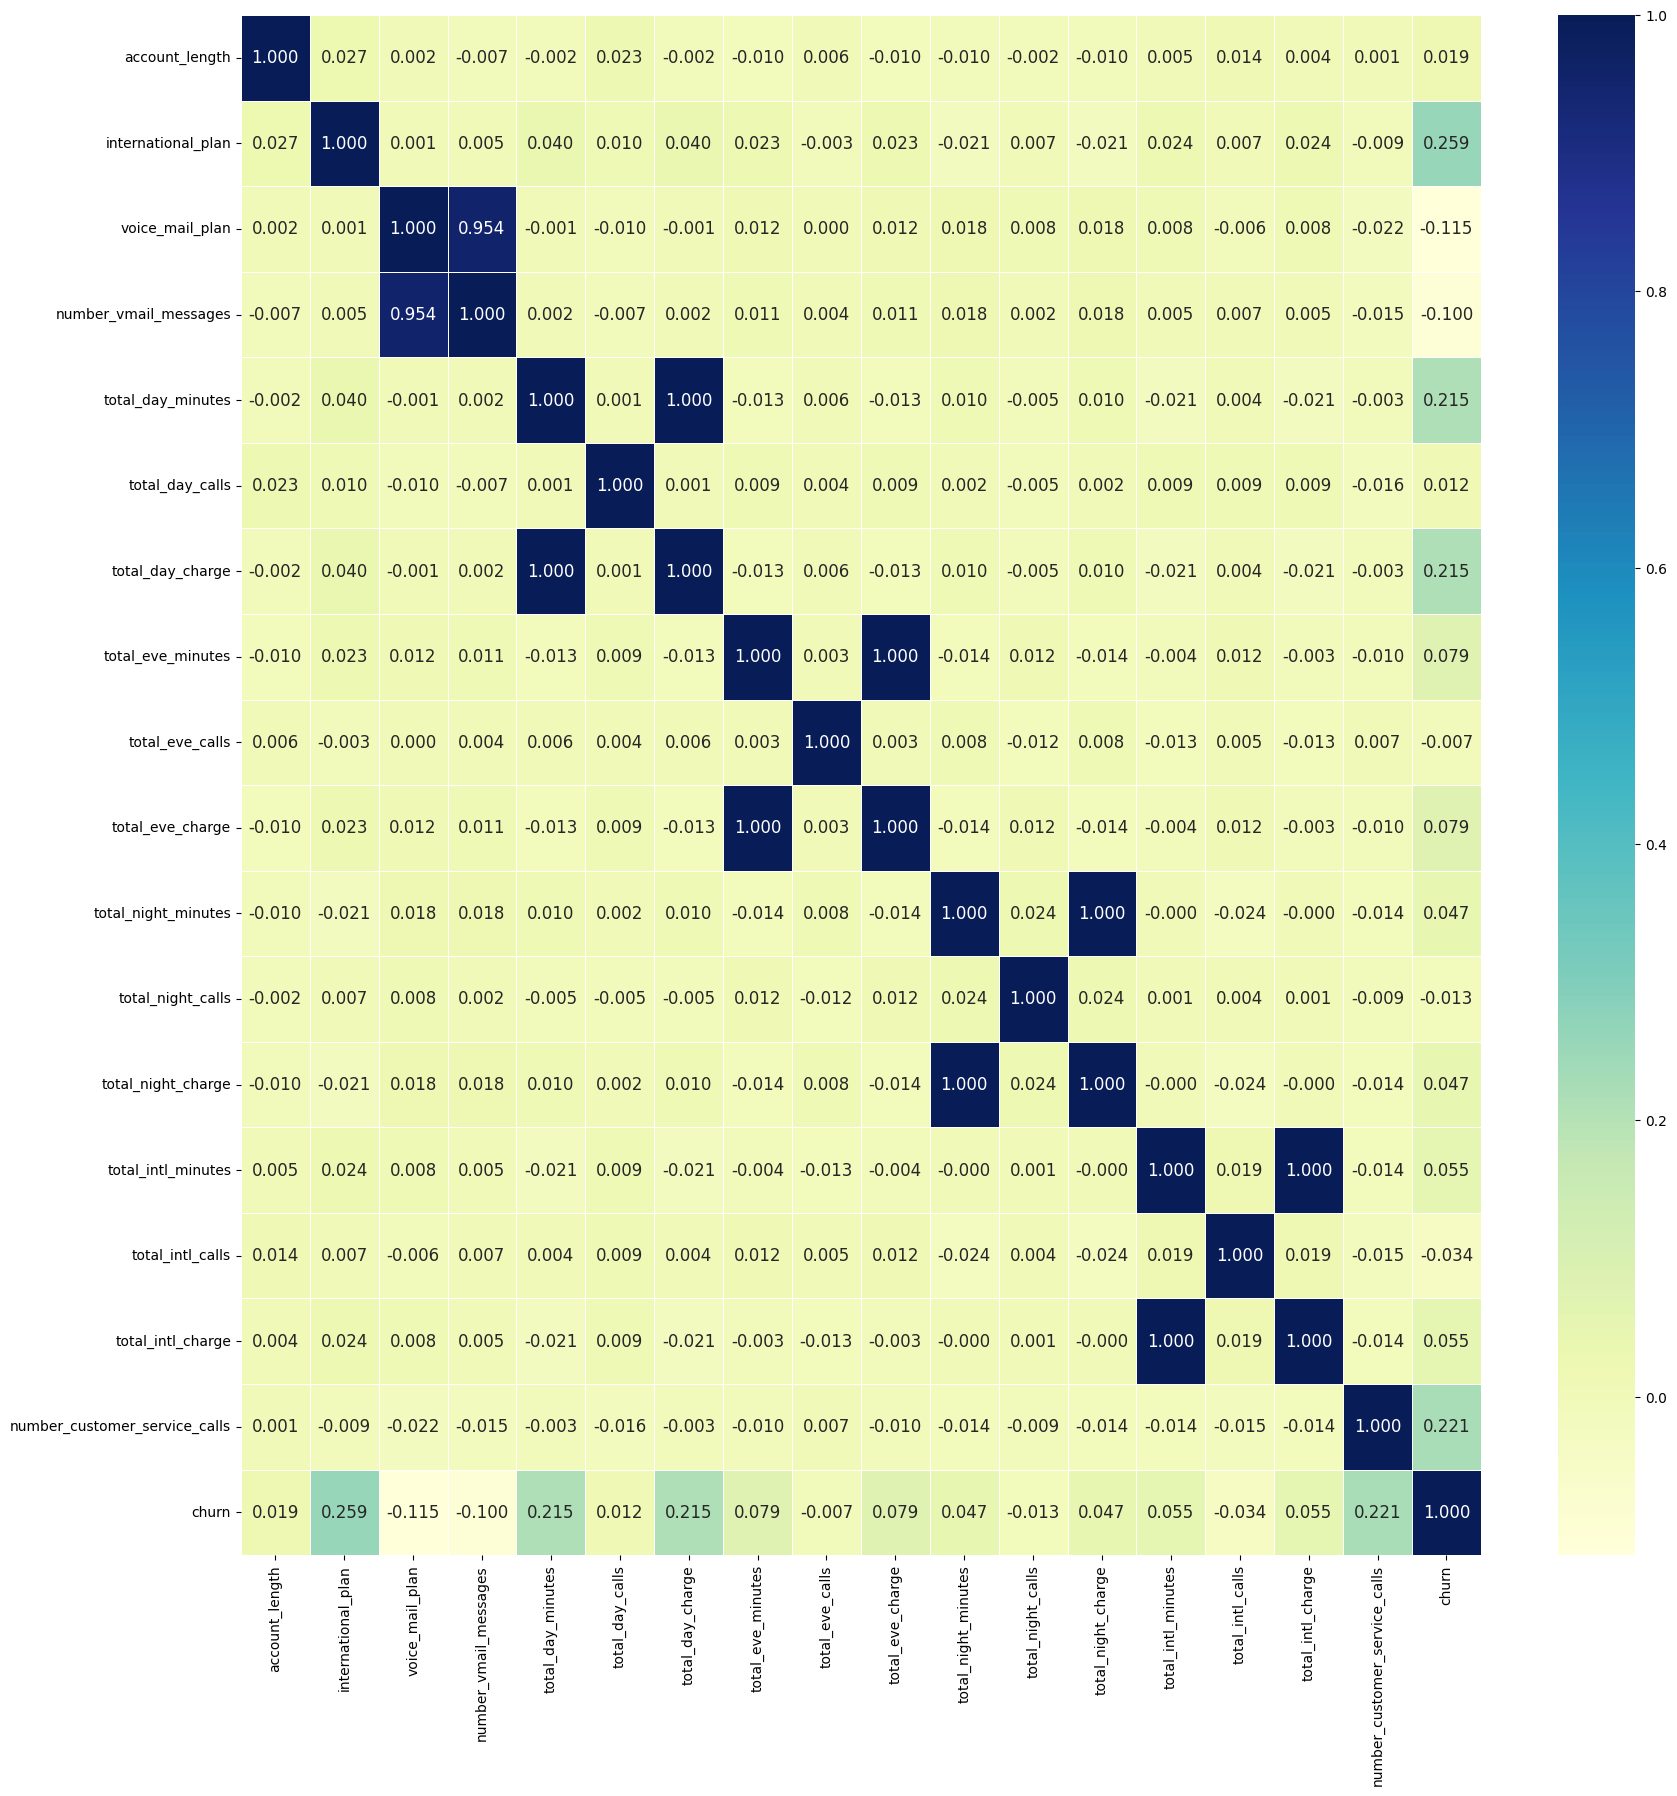

In [33]:
plt.figure(figsize=(20,20))
correlation_matrix = df_train.corr(numeric_only= True)
sns.heatmap(correlation_matrix ,annot=True,  annot_kws={"size": 12}, cmap="YlGnBu",  fmt=".3f", linewidths=.5)
plt.show()

- Korelasi antara total day minutes dan total day charge adalah 1, yang menunjukkan hubungan linier yang kuat. Dimungkinkan untuk menghapus salah satu variabel ini tanpa kehilangan informasi yang signifikan.
- Demikian pula, korelasi antara total eve minutes dan total eve charge adalah 1, yang menunjukkan hubungan linier yang kuat. Salah satu dari variabel ini dapat dihilangkan.
- Korelasi 1 antara total night minutes dan total night charge menyiratkan hubungan linier yang kuat, yang memungkinkan kita untuk membuang salah satu variabel ini.
- Demikian juga, korelasi antara total intl minutes dan total intl charge adalah 1, yang menunjukkan hubungan linier yang kuat, yang memungkinkan kita untuk menghilangkan salah satu dari variabel-variabel ini.

Ketika kita memiliki variabel yang saling berkorelasi sempurna (korelasi 1) satu sama lain, dalam konteks analisis regresi, kita dapat menghadapi masalah yang dikenal sebagai masalah multicollinearity. Multicollinearity terjadi ketika dua atau lebih variabel independen dalam model regresi memiliki hubungan yang sangat kuat sehingga menyulitkan model untuk membedakan efek masing-masing variabel terhadap variabel dependen.

Jika di antara variabel `total intl minutes`, `total intl charge`, dan `total intl calls` ada yang memiliki korelasi 1, kita harus mempertimbangkan untuk menghapus salah satu dari variabel tersebut agar menghindari multicollinearity. Ini karena, dalam konteks regresi, ketika variabel memiliki korelasi 1, satu variabel dapat dijelaskan sepenuhnya oleh yang lain, dan keduanya memberikan informasi yang sama kepada model.

Ketika kita membuat variabel dummy untuk mewakili kategori atau faktor dalam suatu model, kita menciptakan variabel tambahan yang dapat memiliki korelasi tinggi dengan variabel kategori asli. Namun, agar menghindari jebakan dummy (dummy variable trap) atau multicollinearity, kita menghilangkan satu variabel dummy.



# **4.) Pre-processing Data**

Berdasarkan Correlatin Matrix sebelumnya, terdapat multikolinearitas yang tinggi antara satu sama lain, dilakukan penghapusan kolom:
- total day minutes
- total eve minutes
- total night minutes
- total intl minutes

In [34]:
remove = ["total_day_minutes","total_eve_minutes","total_night_minutes","total_intl_minutes", "number_vmail_messages"]
df_train = df_train.drop(remove, axis = 1)
df_test = df_test.drop(remove, axis = 1)


df_train.head(4)

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,NJ,137,area_code_415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,OH,84,area_code_408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,OK,75,area_code_415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [35]:
df_train.groupby(by='area_code').agg({
    'churn': 'count',

})

,churn
area_code,
area_code_408,1086
area_code_415,2108
area_code_510,1056


In [36]:
def replace(df):
  df['area_code'] = df['area_code'].str.replace('area_code_', '')
  return df


In [37]:
df_train = replace(df_train)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,NJ,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,OH,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,OK,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
4,MA,121,510,0,1,88,37.09,108,29.62,118,9.57,7,2.03,3,0


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_calls               4250 non-null   int64  
 12  total_intl_charge              4250 non-null   f

In [39]:
df_train['area_code'] = df_train['area_code'].astype('int64')


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int64  
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_calls               4250 non-null   int64  
 12  total_intl_charge              4250 non-null   f

Karena nilai nunique kolom state terlal banyak, maka akan dilakukan feature encoding dengan menggunakan Target Mean Encoding.


## Using Target Mean Encoding for Feature Encoding

In [40]:
def target_mean_encoding(features,target,data):
  df_encoding = data[[features,target]].groupby(features).mean()
  df_encoding.rename(columns={target:features+"_proba"},inplace=True)
  df_merge = pd.merge(data, df_encoding, on = features, how="inner")
  return df_merge


# Mean Encoding pada state karena memiliki nilai nunique yang banyak
df_train = target_mean_encoding(features="state",target="churn",data=df_train)
df_train = target_mean_encoding(features="area_code",target="churn",data=df_train)

In [41]:
df_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
0,OH,107,415,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.126316,0.136148
1,OH,83,415,0,0,120,57.36,116,19.33,114,6.93,7,4.27,0,1,0.126316,0.136148
2,OH,63,415,1,1,110,33.83,111,24.76,92,8.89,6,2.97,1,0,0.126316,0.136148
3,OH,39,415,0,1,121,24.09,113,19.75,131,9.99,5,3.24,1,0,0.126316,0.136148
4,OH,144,415,0,1,109,18.09,113,9.19,111,9.38,5,2.73,1,0,0.126316,0.136148


In [42]:
# Hapus column state

df_train = df_train.drop(['state','area_code'], axis=1)
df_train.head(6)

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba,area_code_proba
0,107,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.126316,0.136148
1,83,0,0,120,57.36,116,19.33,114,6.93,7,4.27,0,1,0.126316,0.136148
2,63,1,1,110,33.83,111,24.76,92,8.89,6,2.97,1,0,0.126316,0.136148
3,39,0,1,121,24.09,113,19.75,131,9.99,5,3.24,1,0,0.126316,0.136148
4,144,0,1,109,18.09,113,9.19,111,9.38,5,2.73,1,0,0.126316,0.136148
5,136,0,1,88,24.33,65,20.11,120,10.25,5,3.08,2,0,0.126316,0.136148


In [43]:
# import category_encoders as ce

# hash_encoder = ce.HashingEncoder(cols ='state')
# df_train_new = hash_encoder.fit_transform(df1)
# df_val_new = hash_encoder.fit_transform(df2)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(df_train.drop(columns=['churn']))
X = X_train_scaled
y = df_train['churn']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42,stratify= y)

print("Data Train:",X_train.shape, y_train.shape)
print("Data Validation:",X_val.shape, y_val.shape)

Data Train: (2975, 14) (2975,)
Data Validation: (1275, 14) (1275,)


In [45]:
print("Data Train:",X.shape, y.shape)

Data Train: (4250, 14) (4250,)


In [46]:
df_train['churn'].value_counts()

churn
0    3652
1     598
Name: count, dtype: int64

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_calls                4250 non-null   int64  
 6   total_eve_charge               4250 non-null   float64
 7   total_night_calls              4250 non-null   int64  
 8   total_night_charge             4250 non-null   float64
 9   total_intl_calls               4250 non-null   int64  
 10  total_intl_charge              4250 non-null   float64
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   i

In [48]:
# Initiate model
Logistic_Regression = LogisticRegression()
Naive_Bayes = GaussianNB()
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
Gradient_Boosting = GradientBoostingClassifier(learning_rate=0.01, max_depth=3)

In [49]:
model_list = ["Logistic_Regression", "Naive_Bayes", "Decision_Tree", "Random_Forest", "Gradient_Boosting"]

print("Run Logistics Regression")
Logistic_Regression.fit(X_train, y_train)
print("Run Naive Bayes")
Naive_Bayes.fit(X_train, y_train)
print("Run Deision Tree")
Decision_Tree.fit(X_train, y_train)
print("Run Random Forest")
Random_Forest.fit(X_train, y_train)
print("Run Gradient Boosting ")
Gradient_Boosting.fit(X_train, y_train)

accuracy_train = []
accuracy_val = []

for model_name in model_list:
    model = eval(model_name)
    result_train = model.score(X_train, y_train)
    result_val = model.score(X_val, y_val)

    accuracy_train.append(result_train)
    accuracy_val.append(result_val)


df_eval = pd.DataFrame()
df_eval["Model"] = model_list
df_eval["Accuracy Train"] = accuracy_train
df_eval["Accuracy Val"] = accuracy_val
df_eval

Run Logistics Regression
Run Naive Bayes
Run Deision Tree
Run Random Forest
Run Gradient Boosting 


,Model,Accuracy Train,Accuracy Val
0,Logistic_Regression,0.870252,0.866667
1,Naive_Bayes,0.853782,0.862745
2,Decision_Tree,1.000000,0.921569
3,Random_Forest,1.000000,0.950588
4,Gradient_Boosting,0.913277,0.922353


In [50]:
def score_evaluation(X, y, n_fold, method):
  kfold = KFold(n_splits= n_fold, shuffle = True, random_state=42)

  Logistic_Regression = LogisticRegression()
  Naive_Bayes = GaussianNB()
  Decision_Tree = DecisionTreeClassifier()
  Random_Forest = RandomForestClassifier()
  Gradient_Boosting = GradientBoostingClassifier(learning_rate=0.01, max_depth=3)


  model_list = ["Logistic_Regression", "Naive_Bayes", "Decision_Tree", "Random_Forest", "Gradient_Boosting"]

  accuracy = []
  f1 = []
  precision = []
  recall = []
  roc_auc = []

  for model_name in model_list:

    model = eval(model_name)


    if method == 'SMOTE':
      X_sampling, y_sampling = SMOTE().fit_resample(X,y)
    elif method == 'oversampling':
      X_sampling, y_sampling = RandomOverSampler().fit_resample(X,y)
    elif method == 'undersampling':
      X_sampling, y_sampling = RandomUnderSampler().fit_resample(X,y)
    else:
      X_sampling, y_sampling = X, y

    cv_results_train = cross_val_score(model,X_sampling, y_sampling , cv=kfold, scoring='accuracy')
    cv_results_f1 = cross_val_score(model, X_sampling, y_sampling , cv=kfold, scoring='f1')
    cv_results_precision = cross_val_score(model, X_sampling, y_sampling , cv=kfold, scoring= 'precision')
    cv_results_recall = cross_val_score(model,X_sampling, y_sampling , cv=kfold, scoring= 'recall')
    cv_results_roc_auc = cross_val_score(model, X_sampling, y_sampling , cv=kfold, scoring= 'roc_auc')


    acc_train_mean = cv_results_train.mean() # np.mean(cv_results_train)
    f1_mean = cv_results_f1.mean()           # np.mean(cv_results_f1)
    precision_mean = cv_results_precision.mean()
    recall_mean = cv_results_recall.mean()
    roc_auc_mean = cv_results_roc_auc.mean()



    accuracy.append(acc_train_mean)
    f1.append(f1_mean)
    precision.append(precision_mean)
    recall.append(recall_mean)
    roc_auc.append(roc_auc_mean)

  df_eval = pd.DataFrame()
  df_eval["model"] = model_list
  df_eval["accuracy"] = accuracy
  df_eval["F1"] = f1
  df_eval["Precision"] = precision
  df_eval["Recall"] = recall
  df_eval["AUC ROC"] = roc_auc

  return df_eval





In [51]:
score_evaluation(X=X, y=y, n_fold=5, method= None)

,model,accuracy,F1,Precision,Recall,AUC ROC
0,Logistic_Regression,0.868000,0.295982,0.593406,0.200873,0.836069
1,Naive_Bayes,0.854353,0.448203,0.480942,0.422297,0.856900
2,Decision_Tree,0.915529,0.718238,0.698530,0.729599,0.840933
3,Random_Forest,0.947529,0.791441,0.929604,0.685810,0.917193
4,Gradient_Boosting,0.907765,0.533867,0.915384,0.378485,0.881486


In [52]:
score_evaluation(X=X, y=y, n_fold=5, method= 'undersampling')

,model,accuracy,F1,Precision,Recall,AUC ROC
0,Logistic_Regression,0.779254,0.778761,0.780576,0.779531,0.834109
1,Naive_Bayes,0.800174,0.791378,0.820981,0.764082,0.847019
2,Decision_Tree,0.825262,0.810652,0.808220,0.836481,0.814983
3,Random_Forest,0.877082,0.878743,0.888154,0.858397,0.909690
4,Gradient_Boosting,0.828591,0.829509,0.825556,0.835457,0.881477


In [53]:
score_evaluation(X=X, y=y, n_fold=5, method= 'SMOTE')

,model,accuracy,F1,Precision,Recall,AUC ROC
0,Logistic_Regression,0.794908,0.797160,0.788120,0.806544,0.854610
1,Naive_Bayes,0.826534,0.822328,0.842496,0.803175,0.871439
2,Decision_Tree,0.914156,0.913591,0.912283,0.921733,0.916723
3,Random_Forest,0.960706,0.959768,0.969765,0.951753,0.993442
4,Gradient_Boosting,0.863362,0.863333,0.863652,0.863401,0.907908


In [54]:
Gradient_Boosting.fit(X,y)

GradientBoostingClassifier(learning_rate=0.01)

In [55]:
def fit_model(X,y):
  Gradient_Boosting = GradientBoostingClassifier(learning_rate=0.01, max_depth=3)
  Gradient_Boosting.fit(X,y)
  return Gradient_Boosting
model_churn = fit_model(X,y)


In [56]:
a = df_train.drop('churn',axis=1)

In [57]:
df_imp = pd.DataFrame()
df_imp["features"] = a.columns.tolist()
df_imp["importance"] = model_churn.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
4,total_day_charge,0.435318
11,number_customer_service_calls,0.223680
1,international_plan,0.118774
2,voice_mail_plan,0.115064
6,total_eve_charge,0.103390
8,total_night_charge,0.003346
10,total_intl_charge,0.000429
0,account_length,0.000000
3,total_day_calls,0.000000
5,total_eve_calls,0.000000


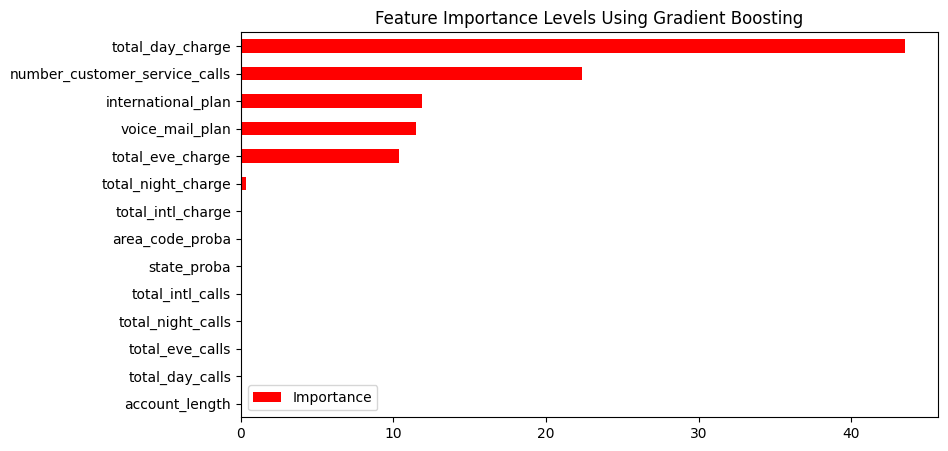

In [58]:
importance =pd.DataFrame({"Importance": model_churn.feature_importances_*100},index = a.columns)
importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels Using Gradient Boosting");
plt.show()

In [59]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.2 MB/s eta 0:00:00


In [61]:
# Buat DataFrame baru dengan kolom "churn" diubah menjadi 0 dan 1
df_train['churn'] = df_train['churn'].apply(lambda x: 1 if x == True else 0)

# Hitung jumlah pelanggan yang churn dan tidak churn berdasarkan jumlah panggilan layanan pelanggan

df_train.groupby(by='number_customer_service_calls')['churn'].value_counts().unstack().fillna(0)

# Tampilkan DataFrame hasil perhitungan



churn,0,1
number_customer_service_calls,,
0,789.0,97.0
1,1358.0,166.0
2,845.0,102.0
3,495.0,63.0
4,117.0,92.0
5,32.0,49.0
6,9.0,19.0
7,6.0,7.0
8,1.0,1.0


In [63]:
df_train.groupby(by='international_plan')['churn'].value_counts().unstack().fillna(0)

churn,0,1
international_plan,,
0,3423,431
1,229,167


In [64]:
df_train.groupby(by='voice_mail_plan')['churn'].value_counts().unstack().fillna(0)

churn,0,1
voice_mail_plan,,
0,2622,516
1,1030,82
